## Домашнее задание "Визуализация данных и описательная статистика"

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(rc={'figure.figsize':(10,5)})

## Знакомство с данными

In [3]:
# выгружаем данные
sal = pd.read_csv('salary_dataset.csv', index_col=0)
sal.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


In [4]:
# приведем названия столбцов к стандартному виду
sal.columns = sal.columns.str.lower().str.replace(' ', '_')

In [5]:
# посмотрим общую информцию
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  6702 non-null   float64
 1   gender               6702 non-null   object 
 2   education_level      6701 non-null   object 
 3   job_title            6702 non-null   object 
 4   years_of_experience  6701 non-null   float64
 5   salary               6699 non-null   float64
 6   country              6704 non-null   object 
 7   race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 471.4+ KB


В поле *salar* 5 пропусков, посмотрим что за пропуски

In [6]:
sal[sal.salary.isna()]

,age,gender,education_level,job_title,years_of_experience,salary,country,race
172,NaN,NaN,NaN,NaN,NaN,NaN,UK,White
260,NaN,NaN,NaN,NaN,NaN,NaN,Canada,White
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN,Canada,White
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN,USA,White
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN,Canada,White


В 2 строках почти нет записей, удалим ихю От удаления этих строк мы ничего не потеряем.

In [7]:
# удаляем эти строки
sal = sal.dropna(thresh=4).reset_index(drop=True)

In [8]:
# посмотрим на статистику данных
sal.describe(include='all')

,age,gender,education_level,job_title,years_of_experience,salary,country,race
count,6702.000000,6702,6701,6702,6701.000000,6699.000000,6702,6702
unique,NaN,3,7,193,NaN,NaN,5,10
top,NaN,Male,Bachelor's Degree,Software Engineer,NaN,NaN,USA,White
freq,NaN,3674,2267,518,NaN,NaN,1360,1966
mean,33.620859,NaN,NaN,NaN,8.094687,115326.964771,NaN,NaN
std,7.614633,NaN,NaN,NaN,6.059003,52786.183911,NaN,NaN
min,21.000000,NaN,NaN,NaN,0.000000,350.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,3.000000,70000.000000,NaN,NaN
50%,32.000000,NaN,NaN,NaN,7.000000,115000.000000,NaN,NaN
75%,38.000000,NaN,NaN,NaN,12.000000,160000.000000,NaN,NaN


В данных представлены 10 национальностей из 5 стран, из которых 55% мужчин, возраст лиц в данных от 21 до 62 лет, с максимальным сажем работы 34 года и максимальным уровнем дохода 250 тыс

## Распределния

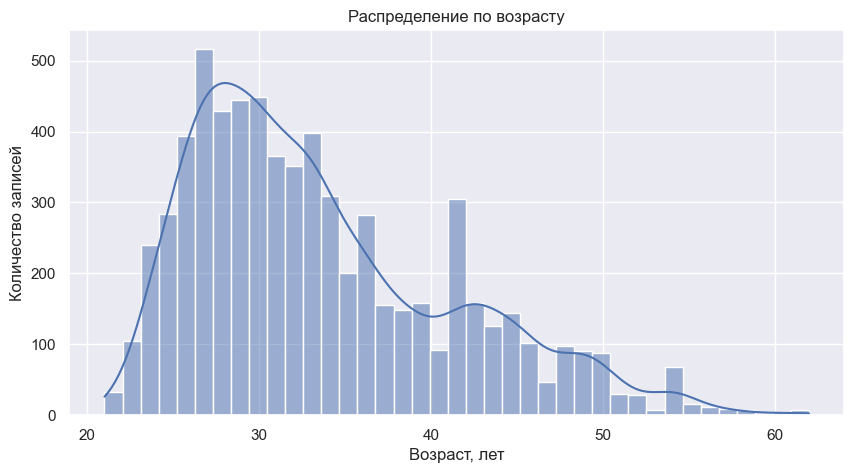

In [9]:
sns.histplot(sal, x='age', kde=1)
plt.xlabel('Возраст, лет')
plt.ylabel('Количество записей')
plt.title('Распределение по возрасту')
plt.show()

Большая часть рабочих в данных от 20 до 50, нормальное распределение с хвостом в право

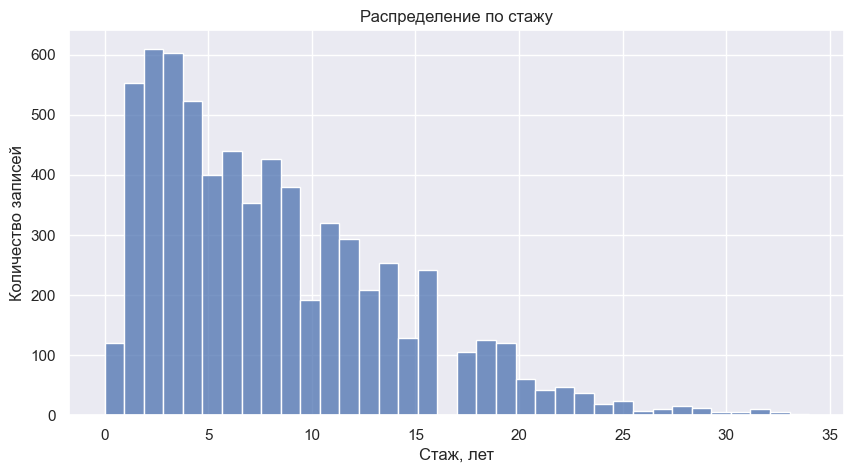

In [10]:
sns.histplot(sal, x='years_of_experience')
plt.xlabel('Стаж, лет')
plt.ylabel('Количество записей')
plt.title('Распределение по стажу')
plt.show()

Большинство записей со стажем до 5 лет, с каждым дополнительным годом частота стажа почти равномерно снижается

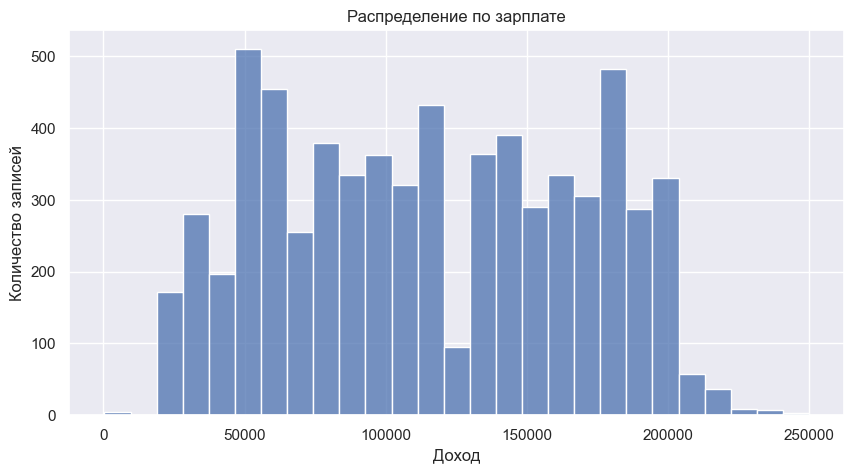

In [11]:
sns.histplot(sal, x='salary')
plt.xlabel('Доход')
plt.ylabel('Количество записей')
plt.title('Распределение по зарплате')
plt.show()

А вот доходы распределены почти равномерно от 20 тыс до 200 тыс

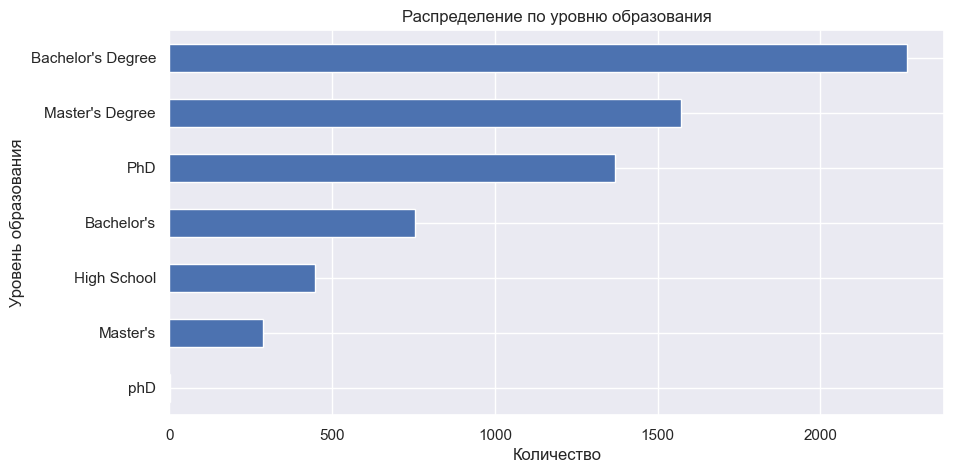

In [12]:
# попсмотрим на распределение по уровню образования
sal.education_level.value_counts(ascending=1).plot(kind='barh')
plt.xlabel('Количество')
plt.ylabel('Уровень образования')
plt.title('Распределение по уровню образования')
plt.show()

Больше всего человек со степенью бакалавра, меньше со степенью магистра и докторов философии, далее идут бакалавры, старшая школа и магистры. К тому же есть разные записи доктора философии, приведем их к одинаковому виду

In [13]:
sal.education_level = sal.education_level.replace({'phD':'PhD'})

In [14]:
# посмотрим на первые 10 самых часто встречающихся специальностей
sal.job_title.value_counts()[:10]

Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Back end Developer           244
Senior Software Engineer     244
Name: job_title, dtype: int64

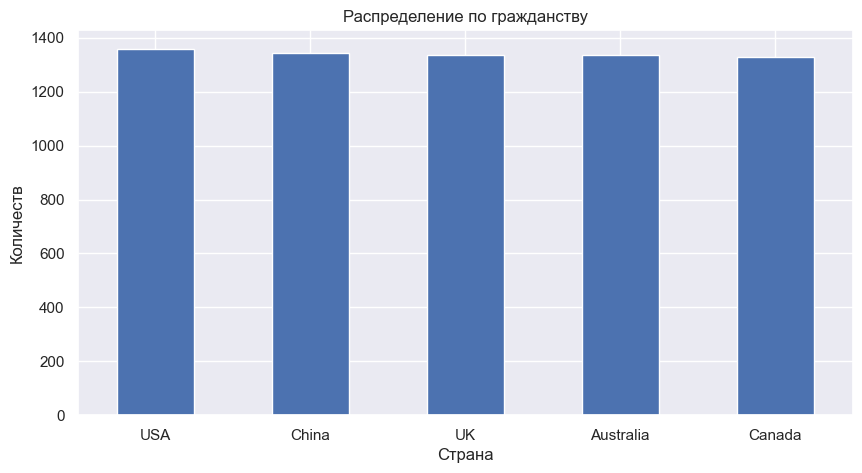

In [15]:
sal.country.value_counts().plot(kind='bar')
plt.xlabel('Страна')
plt.ylabel('Количеств')
plt.xticks(rotation=0)
plt.title('Распределение по гражданству')
plt.show()

По гражданству все распределены равномерно

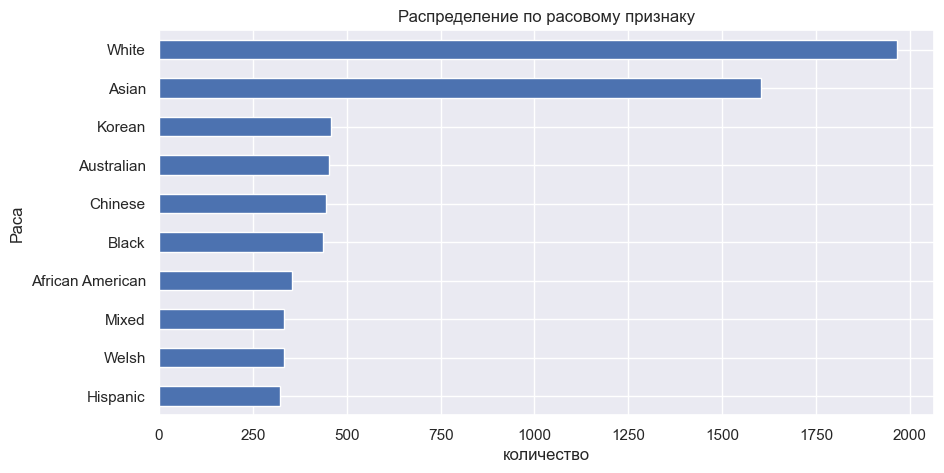

In [16]:
sal.race.value_counts(ascending=1).plot(kind='barh')
plt.xlabel('количество')
plt.ylabel('Раса')
plt.title('Распределение по расовому признаку')
plt.show()

больше всего встречаются азиаты (в том числе корейцы и китайцы) и белые

## Выбросы в данных

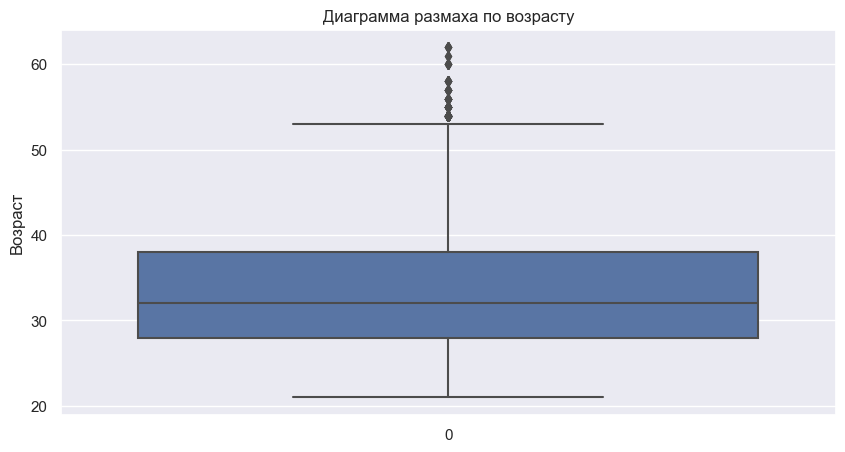

In [17]:
sns.boxplot(sal.age)
plt.ylabel('Возраст')
plt.title('Диаграмма размаха по возрасту')
plt.show()

По возрасту выбросы начинатся с 53 лет, возможно, это связано с молодыми специальностями, представленными в данных. 

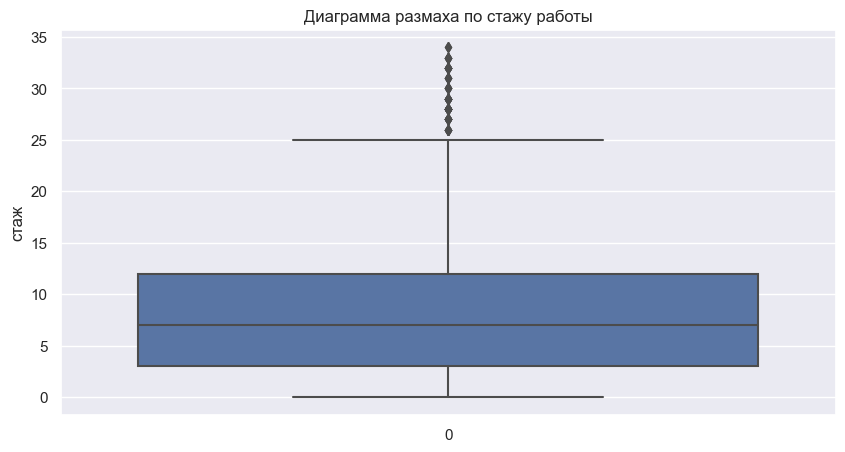

In [18]:
sns.boxplot(sal.years_of_experience)
plt.ylabel('стаж')
plt.title('Диаграмма размаха по стажу работы')
plt.show()

Стаж зависит от возраста, поэтому здесь выбросы тоже начинаются с 25 лет, когда работник становится старше 50 лет

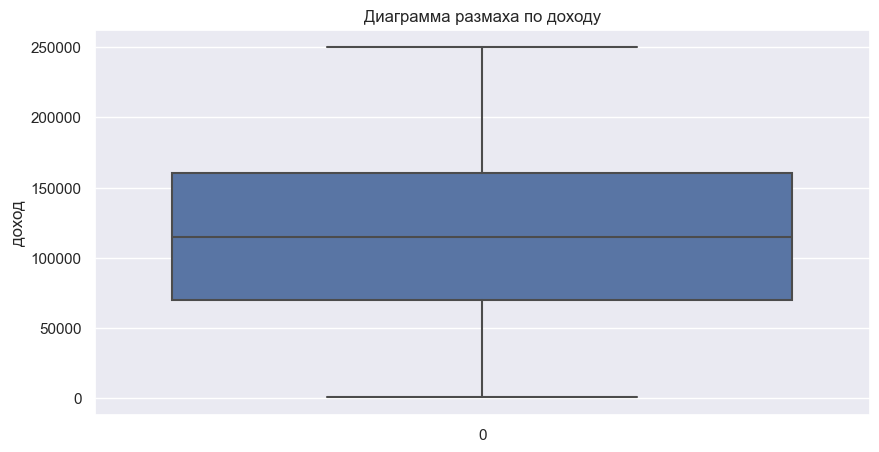

In [19]:
sns.boxplot(sal.salary)
plt.ylabel('доход')
plt.title('Диаграмма размаха по доходу')
plt.show()

В доходе нет выбросов, что соответствует ранее описанному распределению, возможно, выборка взята из одной компании или людей занятых в определенной сфере деятельности

## вопросы

### зависит ли зарплата от пола

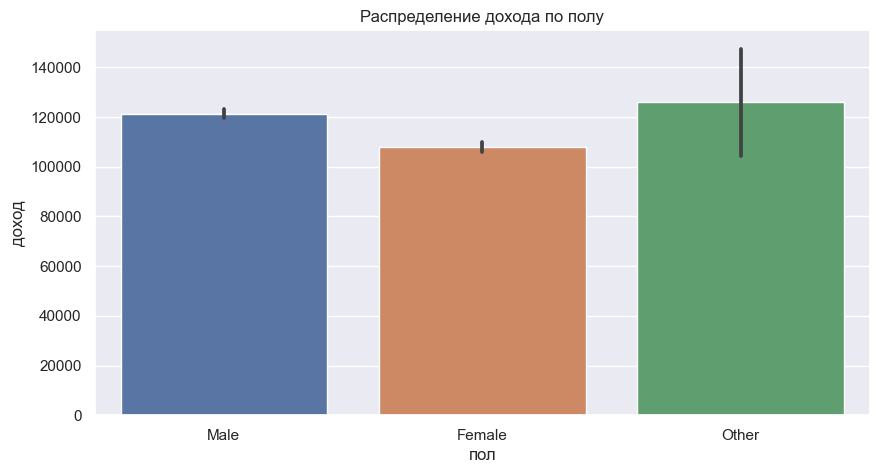

In [20]:
sns.barplot(sal, x='gender', y='salary')
plt.ylabel('доход')
plt.xlabel('пол')
plt.title('Распределение дохода по полу')
plt.show()

Женщины зарабатывают меньше мужчин, но больше всех доход у небинарных личностей, но и разброс значений в этой категории больше

### Есть ли разница в уровне дохода от национальности

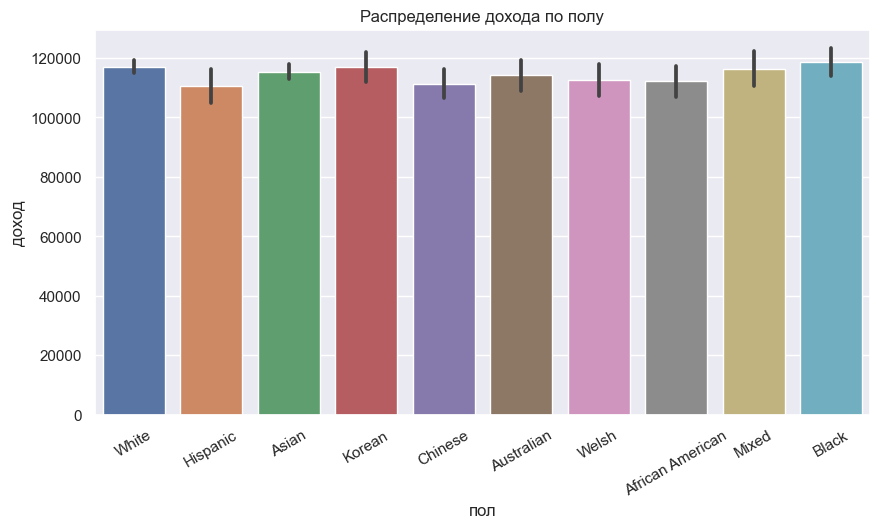

In [21]:
sns.barplot(sal, x='race', y='salary')
plt.ylabel('доход')
plt.xlabel('пол')
plt.xticks(rotation=30)
plt.title('Распределение дохода по полу')
plt.show()

Доход не сильно отличается от национальности

### Зависит ли зарплата от возраста

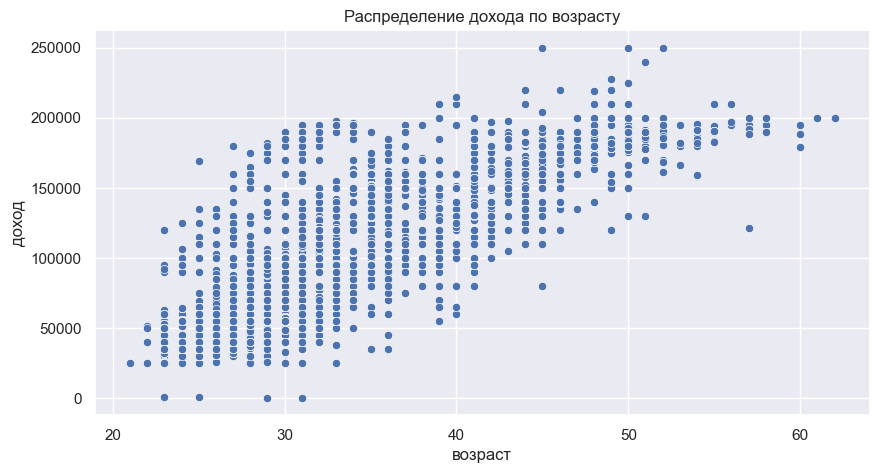

In [28]:
sns.scatterplot(sal, x='age', y='salary')
plt.ylabel('доход')
plt.xlabel('возраст')
plt.title('Распределение дохода по возрасту')
plt.show()

С возрастом зарплата растет, но и разброс большой

### У мужчин или у женщин больше уровень образования

In [51]:
sal.education_level = pd.Categorical(sal.education_level,
    ['High School',"Bachelor's","Bachelor's Degree","Master's","Master's Degree",'PhD'])

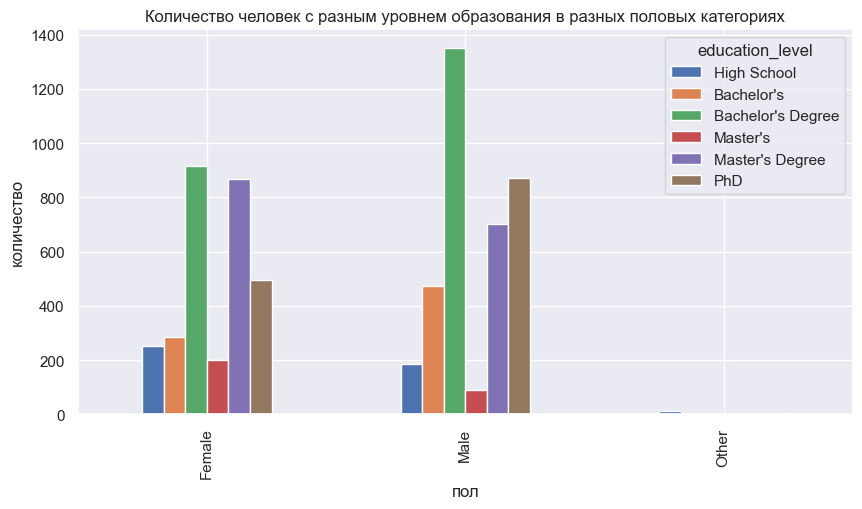

In [55]:
sal.pivot_table(
    index='gender',
    columns='education_level',
    values='age',
    aggfunc='count'
).plot(kind='bar')
plt.ylabel('количество')
plt.xlabel('пол')
plt.title('Количество человек с разным уровнем образования в разных половых категориях')
plt.show()

Больше всего человек со степенью бакалавра и среди мужчин и среди женщин, но женщин со степенью магистра больше, чем докторов философии, а у мужчин наоборот докторов больше. Значит женщины реже доучиваются до докторов философии, как минимум в данной выборке